<a href="https://colab.research.google.com/github/akankhyapanda/plant_disease/blob/main/plant_disease_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
IMAGE_SIZE = 256

In [ ]:
dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/gdrive/MyDrive/potato disease",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size = 32
)

Found 2152 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
for image_batch ,label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 1 1 0 0 1 0 0 1 0 0 1 2 1 2 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1]


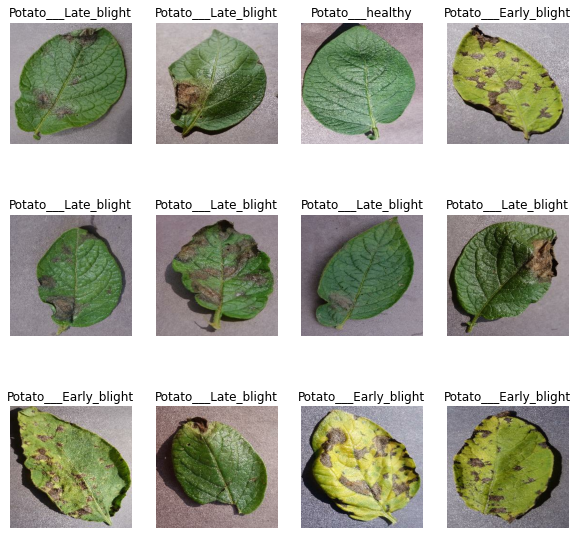

In [ ]:
plt.figure(figsize=(10,10))
for image_batch ,label_batch in dataset.take(1):
  for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.axis("off")
    plt.title(class_names[label_batch[i]])


In [ ]:
train_size = 0.8
len(dataset)*train_size

In [ ]:
#splitting dataset
train_ds = dataset.take(54)
len(train_ds)

In [ ]:
test_ds = dataset.skip(54)# 14 elements

In [ ]:
val_ds = test_ds.take(6)

In [ ]:
test_ds = test_ds.skip(6)

In [ ]:
def get_dataset_partition(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
      ds = ds.shuffle(shuffle_size,seed=12)

    train_size= int(train_split*ds_size)
    val_size = int(val_split*ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds



In [ ]:
train_ds,val_ds,test_ds = get_dataset_partition(dataset)

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
                     layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
                     layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
# data augmentation
data_augmentation = tf.keras.Sequential([
                    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
                    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
input_shape =(32,IMAGE_SIZE,IMAGE_SIZE,3)
model =  models.Sequential([
          resize_and_rescale,
          data_augmentation,
          layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
          layers.MaxPooling2D((2,2)),
          layers.Conv2D(64,(3,3),activation='relu'),
          layers.MaxPooling2D((2,2)),
          layers.Conv2D(64,(3,3),activation='relu'),
          layers.MaxPooling2D((2,2)),
          layers.Conv2D(64,(3,3),activation='relu'),
          layers.MaxPooling2D((2,2)),
          layers.Conv2D(64,(3,3),activation='relu'),
          layers.MaxPooling2D((2,2)),
          layers.Conv2D(64,(3,3),activation='relu'),
          layers.MaxPooling2D((2,2)),
          layers.Flatten(),
          layers.Dense(64,activation='relu'),
          layers.Dense(3,activation='softmax'),





])
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)


In [ ]:
hitory = model.fit(
    train_ds,
    epochs=50,
    batch_size=32,
    verbose=1,
    validation_data=val_ds
)


Epoch 1/50
54/54 [==============================] - 201s 246ms/step - loss: 0.9107 - accuracy: 0.5023 - val_loss: 0.9065 - val_accuracy: 0.6771
Epoch 2/50
54/54 [==============================] - 7s 137ms/step - loss: 0.7008 - accuracy: 0.6927 - val_loss: 0.7115 - val_accuracy: 0.6667
Epoch 3/50
54/54 [==============================] - 7s 137ms/step - loss: 0.4191 - accuracy: 0.8241 - val_loss: 0.3674 - val_accuracy: 0.8698
Epoch 4/50
54/54 [==============================] - 7s 137ms/step - loss: 0.3829 - accuracy: 0.8432 - val_loss: 0.5459 - val_accuracy: 0.8125
Epoch 5/50
54/54 [==============================] - 7s 137ms/step - loss: 0.2987 - accuracy: 0.8860 - val_loss: 0.3157 - val_accuracy: 0.8802
Epoch 6/50
54/54 [==============================] - 7s 137ms/step - loss: 0.2925 - accuracy: 0.8727 - val_loss: 0.3362 - val_accuracy: 0.8542
Epoch 7/50
54/54 [==============================] - 7s 137ms/step - loss: 0.2815 - accuracy: 0.8935 - val_loss: 0.2334 - val_accuracy: 0.8958
Epoc

In [ ]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 1s 64ms/step - loss: 0.0532 - accuracy: 0.9844


In [ ]:
hitory

In [ ]:
hitory.params

{'epochs': 50, 'steps': 54, 'verbose': 1}

In [ ]:
hitory.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
hitory.history["accuracy"]

[0.5023148059844971,
 0.6927083134651184,
 0.8240740895271301,
 0.8431712985038757,
 0.8859953880310059,
 0.8726851940155029,
 0.8935185074806213,
 0.8987268805503845,
 0.9184027910232544,
 0.9380787014961243,
 0.9091435074806213,
 0.9328703880310059,
 0.9346064925193787,
 0.9427083134651184,
 0.9461805820465088,
 0.9525462985038757,
 0.9554398059844971,
 0.9618055820465088,
 0.9560185074806213,
 0.9548611044883728,
 0.96875,
 0.953125,
 0.9704861044883728,
 0.9728009104728699,
 0.9768518805503845,
 0.9797453880310059,
 0.9849537014961243,
 0.9745370149612427,
 0.9855324029922485,
 0.9861111044883728,
 0.9803240895271301,
 0.9872685074806213,
 0.9768518805503845,
 0.9756944179534912,
 0.9803240895271301,
 0.9861111044883728,
 0.9606481194496155,
 0.9826388955116272,
 0.9878472089767456,
 0.9849537014961243,
 0.9947916865348816,
 0.9745370149612427,
 0.9866898059844971,
 0.9878472089767456,
 0.9866898059844971,
 0.9953703880310059,
 0.9907407164573669,
 0.9942129850387573,
 0.9901620149

In [ ]:
acc = hitory.history["accuracy"]
val_acc =hitory.history["val_accuracy"]

loss = hitory.history["loss"]
val_loss = hitory.history["val_loss"]

Text(0.5, 1.0, 'training and validation loss')

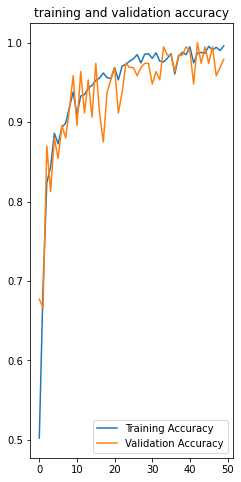

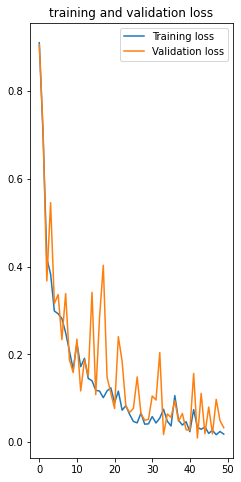

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(50),acc,label="Training Accuracy")
plt.plot(range(50),val_acc,label='Validation Accuracy')
plt.legend(loc="lower right")
plt.title("training and validation accuracy")

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(50),loss,label="Training loss")
plt.plot(range(50),val_loss,label='Validation loss')
plt.legend(loc="upper right")
plt.title("training and validation loss")

first image to predict
actual label: Potato___Late_blight
predicted label Potato___Late_blight


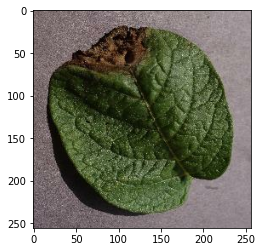

In [ ]:
for images_batch ,labels_batch in test_ds.take(1):
  first_image = images_batch[0].numpy().astype('uint8')
  first_label = labels_batch[0].numpy()

  print('first image to predict')
  plt.imshow(first_image)
  print("actual label:",class_names[first_label])

  batch_prediction = model.predict(image_batch)
  print("predicted label",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model,img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array,0)#create a batch

  predictions = model.predict(img_array)

  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100*(np.max(predictions[0])),2)
  return predicted_class,confidence

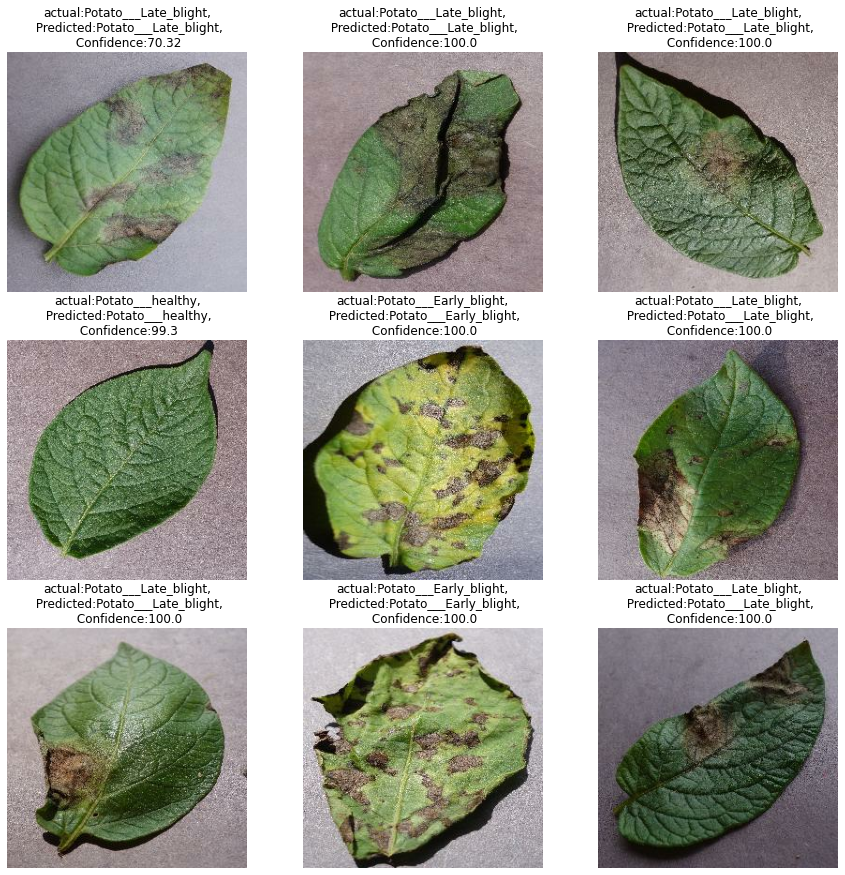

In [ ]:
plt.figure(figsize=(15,15))
for images , labels in test_ds.take(1):
  for i in range(9):
    ax= plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))

    predicted_class ,confidence = predict(model,images[i].numpy())
    actual_class = class_names[labels[i]]
    plt.title(f'actual:{actual_class},\n Predicted:{predicted_class},\n Confidence:{confidence}')
    plt.axis("off")

In [ ]:
model_version =1
model.save("/content/gdrive/MyDrive/potato disease/my model")

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/potato disease/my model/assets
